In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data_folder <-  "all_germline_filtered_bams_tumor_subtract_other_tumor_ci5_cs1e9" #"ci5_cs1e9"  #  "all_germline_ci5_cs1e9" #"all_germline_filtered_bams_tumor_ci5_cs1e9"   # "all_germline_filtered_bams_tumor_subtract_other_tumor_ci5_cs1e9"
big_ratio_file_name <- "big_ratio.csv" #"big_ratio_singletons_excluded_tumor_4_cs.csv" # "big_ratio_all_germline_singletons_excluded_tumor_4_cs.csv" #"big_ratio.csv" # #
small_ratio_file_name <- "small_ratio.csv" #"small_ratio_singletons_excluded_tumor_4_cs.csv" #"small_ratio_all_germline_singletons_excluded_tumor_4_cs.csv" #"small_ratio.csv" # #

In [3]:
paramspace <- read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv")

In [4]:
paramspace <- paramspace %>% select(pt_id, cfDNA_folder)

In [5]:
head(paramspace)

pt_id,cfDNA_folder
C04689,C303A04689D_cfdna_N295-103
C04689,C305A04689D_cfdna_N295-71
C04689,C309A04689D_cfdna_N295-47
C04689,C302A04689D_cfdna_N295-102
C04689,C299A04689D_cfdna_N295-99
C04689,C307A04689D_cfdna_N295-110


In [6]:
patients <- as.character(unique(paramspace$pt_id))

In [7]:
patients

[1] "C04689" "C04816" "C04837" "C04849" "C04873" "C04874" "C04886" "C04887"
 [9] "C05048" "C05073" "C05084" "C05118" "C05194" "C05234" "C05703"

In [8]:
read_counts <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(read_counts) <-c("pt_id", "cfDNA_sample", "readcount")

In [9]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/cs1e9/cfDNA_count.csv", sep = ""), header=FALSE)
        read_counts[nrow(read_counts)+1,] = c(i, j, reads)
    }}

In [10]:
read_counts

pt_id,cfDNA_sample,readcount
C04689,C303A04689D_cfdna_N295-103,827991065
C04689,C305A04689D_cfdna_N295-71,883469138
C04689,C309A04689D_cfdna_N295-47,817835199
C04689,C302A04689D_cfdna_N295-102,922155779
C04689,C299A04689D_cfdna_N295-99,932048828
C04689,C307A04689D_cfdna_N295-110,890590110
C04689,C300A04689D_cfdna_N295-100,1146394933
C04689,C306A04689D_cfdna_N295-90,938698170
C04689,C312A04689D_cfdna_N295-162,1007226108
C04689,C311A04689D_cfdna_N295-157,940465477


In [11]:
write.csv(read_counts, "../data/read_counts.csv", row.names=FALSE)

## Combine the ratios for all patients in one data frame

In [12]:
big_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(big_ratio) <-c("pt_id", "cfDNA_sample", "big_ratio")

In [13]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/", data_folder, "/", big_ratio_file_name, sep = ""))
        reads <- reads %>% select(ratio)
        big_ratio[nrow(big_ratio)+1,] = c(i, j, reads)
    }}

In [14]:
small_ratio <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(small_ratio) <-c("pt_id", "cfDNA_sample", "small_ratio")

In [15]:
for (i in patients){
    paramspace_patient <- paramspace %>% filter(pt_id == i)
    for (j in paramspace_patient$cfDNA_folder){
        reads <- read.csv(paste("../data/", i, "/", j, "/", data_folder, "/", small_ratio_file_name, sep = ""))
        reads <- reads %>% select(ratio)
        small_ratio[nrow(small_ratio)+1,] = c(i, j, reads)
    }}

## Plots

In [16]:
big_ratio <- big_ratio %>% select("cfDNA_sample", "big_ratio")

In [17]:
small_ratio <- small_ratio %>% select("cfDNA_sample", "small_ratio")

In [18]:
ratios_and_counts <- left_join(read_counts, big_ratio, by="cfDNA_sample")
ratios_and_counts <- left_join(ratios_and_counts, small_ratio, by="cfDNA_sample")

In [19]:
cor(ratios_and_counts$big_ratio, ratios_and_counts$readcount)

[1] 0.03341918

Saving 6.67 x 6.67 in image


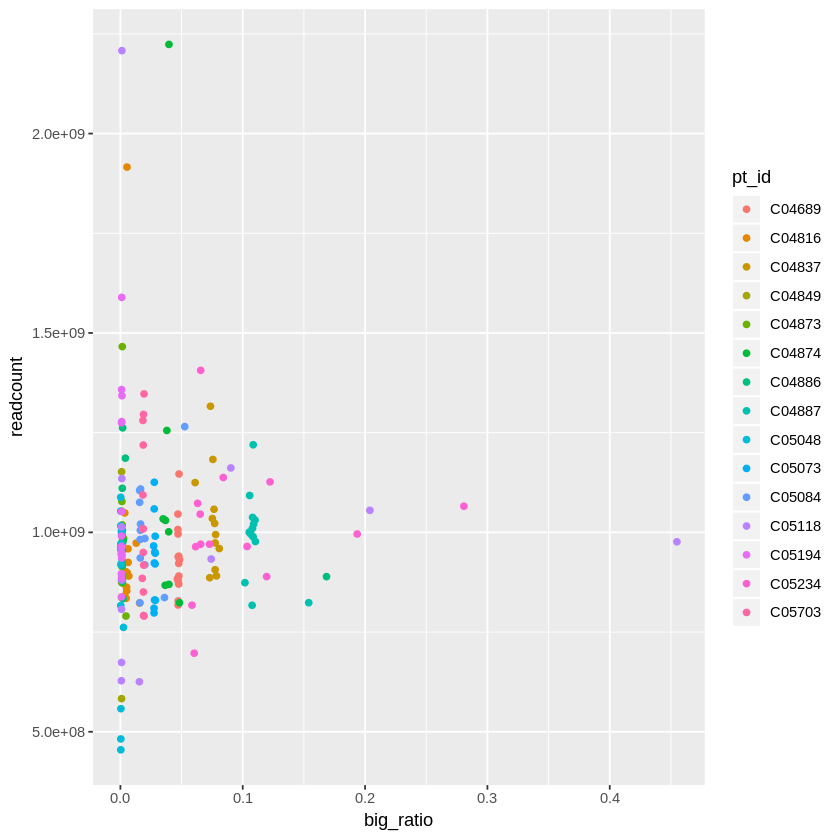

In [20]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = big_ratio, y = readcount, color = pt_id))
    #+geom_text(aes(x = big_ratio, y = readcount, label = pt_id))

ggsave(paste("../plotting_results/Correlation_readcounts/", data_folder, "_big_ratio", ".png", sep=""))

Saving 6.67 x 6.67 in image


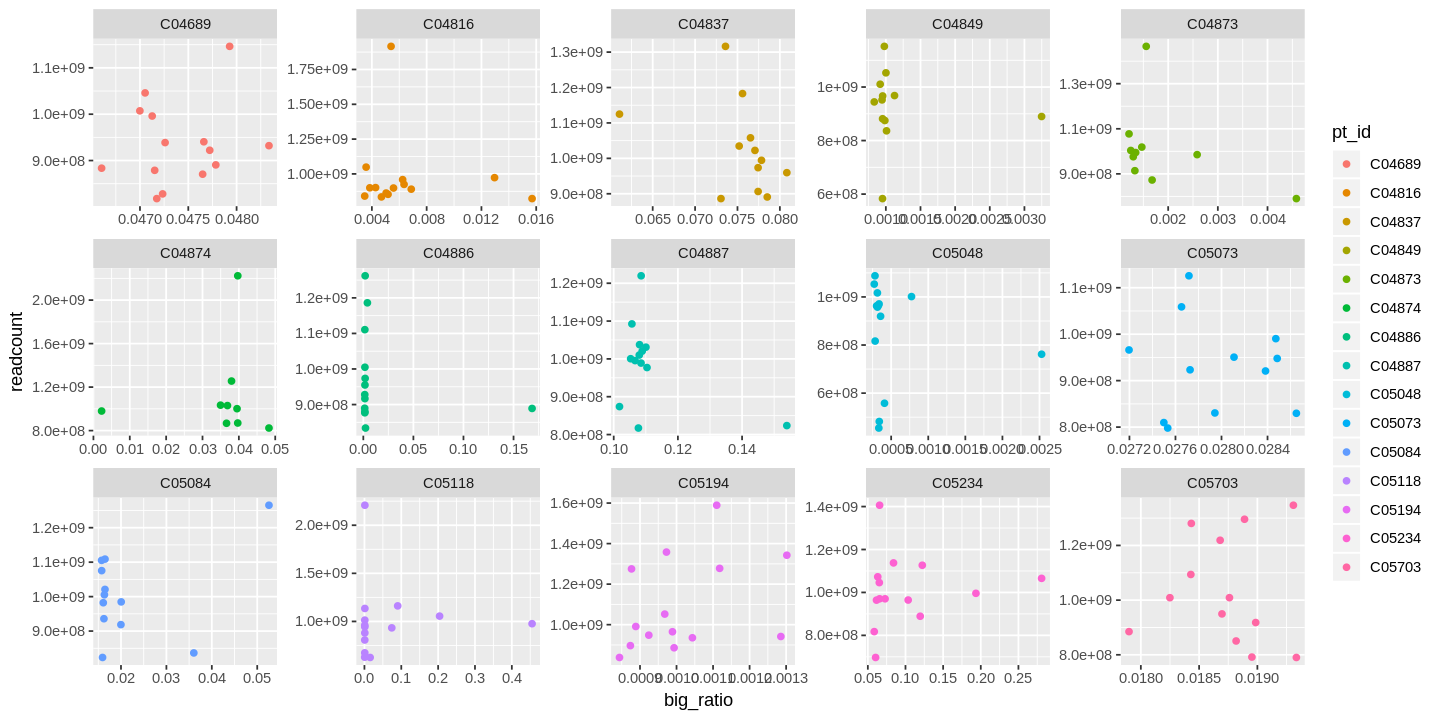

In [21]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = big_ratio, y = readcount, color = pt_id)) + facet_wrap(~pt_id, ncol = 5, scales = "free")

ggsave(paste("../plotting_results/Correlation_readcounts/", data_folder, "_big_ratio_faceted", ".png", sep=""))

In [22]:
cor(ratios_and_counts$small_ratio, ratios_and_counts$readcount)

[1] 0.1015706

Saving 6.67 x 6.67 in image


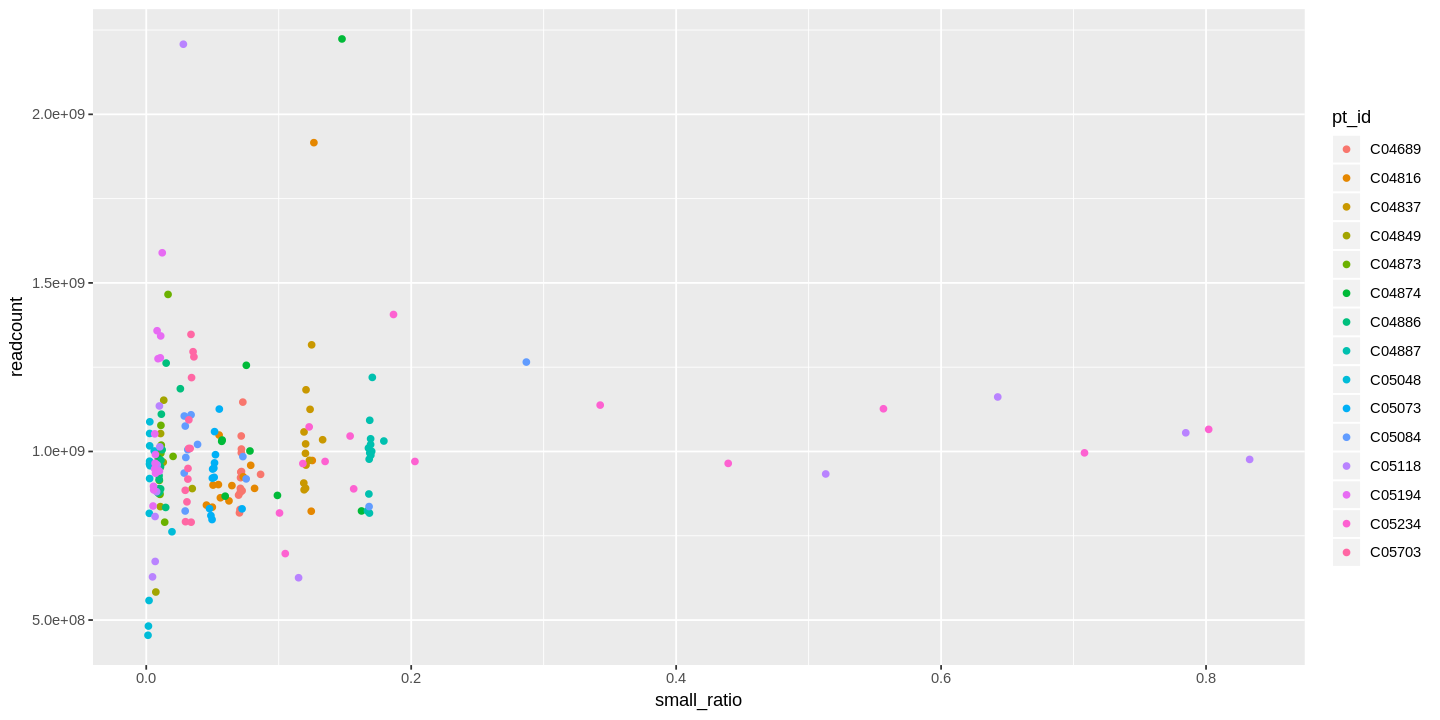

In [23]:
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = small_ratio, y = readcount, color = pt_id))

ggsave(paste("../plotting_results/Correlation_readcounts/", data_folder, "_small_ratio", ".png", sep=""))

Saving 6.67 x 6.67 in image


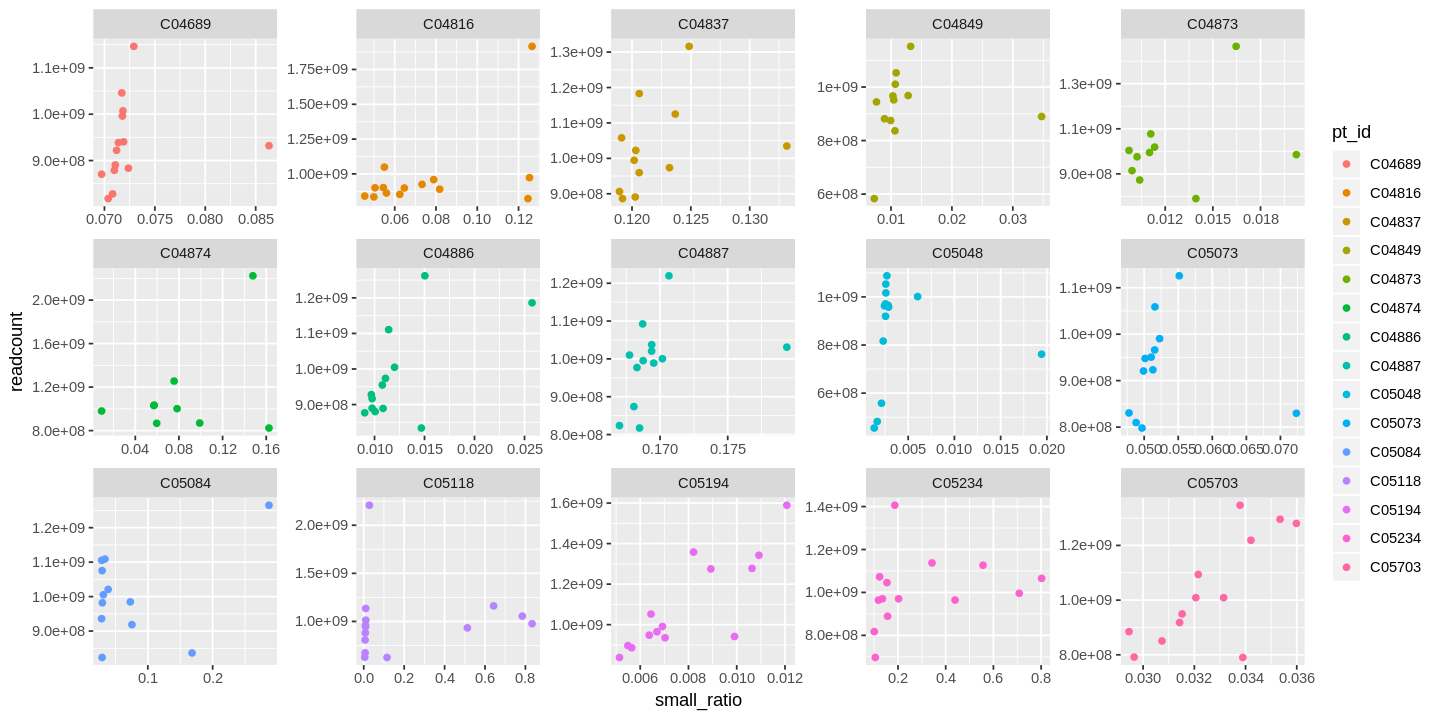

In [24]:
options(repr.plot.width=12, repr.plot.height=6)
ggplot(data = ratios_and_counts)+
    geom_point(aes(x = small_ratio, y = readcount, color = pt_id)) + facet_wrap(~pt_id, ncol = 5, scales = "free")

ggsave(paste("../plotting_results/Correlation_readcounts/", data_folder, "_small_ratio_faceted", ".png", sep=""))

In [25]:
pt_correlation <- ratios_and_counts %>% group_by(pt_id)  %>% transmute(corr_big = cor(readcount, big_ratio), corr_small = cor(readcount, small_ratio)) %>% unique()

In [26]:
pt_correlation

pt_id,corr_big,corr_small
C04689,0.166128801,0.136179009
C04816,-0.098601091,0.508482627
C04837,-0.395294768,0.332721554
C04849,-0.075104152,0.093311838
C04873,-0.409862641,0.330998394
C04874,0.088808204,0.388946721
C04886,-0.195878815,0.622462088
C04887,-0.412435798,0.330165420
C05048,-0.122288091,-0.004170097
C05073,-0.056710825,-0.054313234


In [27]:
mean_big = mean(pt_correlation$corr_big)
mean_big

mean_small = mean(pt_correlation$corr_small)
mean_small

[1] -0.0426149

[1] 0.3290189

In [28]:
write.csv(pt_correlation, paste("../plotting_results/Correlation_readcounts/", data_folder, ".csv", sep=""), row.names= FALSE)

In [29]:
pt_correlation

pt_id,corr_big,corr_small
C04689,0.166128801,0.136179009
C04816,-0.098601091,0.508482627
C04837,-0.395294768,0.332721554
C04849,-0.075104152,0.093311838
C04873,-0.409862641,0.330998394
C04874,0.088808204,0.388946721
C04886,-0.195878815,0.622462088
C04887,-0.412435798,0.330165420
C05048,-0.122288091,-0.004170097
C05073,-0.056710825,-0.054313234


In [30]:
ratios_and_counts

pt_id,cfDNA_sample,readcount,big_ratio,small_ratio
C04689,C303A04689D_cfdna_N295-103,827991065,0.047234625,0.07080821
C04689,C305A04689D_cfdna_N295-71,883469138,0.046602990,0.07237706
C04689,C309A04689D_cfdna_N295-47,817835199,0.047173928,0.07036901
C04689,C302A04689D_cfdna_N295-102,922155779,0.047722046,0.07120586
C04689,C299A04689D_cfdna_N295-99,932048828,0.048335065,0.08631871
C04689,C307A04689D_cfdna_N295-110,890590110,0.047784849,0.07107925
C04689,C300A04689D_cfdna_N295-100,1146394933,0.047928095,0.07291123
C04689,C306A04689D_cfdna_N295-90,938698170,0.047259924,0.07139183
C04689,C312A04689D_cfdna_N295-162,1007226108,0.046998815,0.07183499
C04689,C311A04689D_cfdna_N295-157,940465477,0.047660994,0.07189632
